In [1]:
# import all necessary libraries
# data handling libraries
import numpy as np
import pandas as pd
from numpy import asarray

# visulization libraries
import graphviz
import matplotlib.pyplot as plt
import pydotplus
from matplotlib.legend_handler import HandlerLine2D
from IPython.display import Image  
from sklearn.tree import export_graphviz
from six import StringIO 

# preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# statistical analysis and metrics
from scipy import stats

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


In [2]:
# pip install xgboost

In [3]:
# load data set
df=pd.read_csv('E:/Downloads/CA-04/census_data.csv')

In [4]:
# take look at data - top 10 rows, shows binned data and bin ranges
df.head(10)

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0
5,b. 31-40,e. High,c. High,a. = 0,b. Mid,d. 14,d. Masters,b. income,d. 36-40 & 56-60,train,0
6,a. 0-30,a. Low,b. Mid,a. = 0,a. Low,a. 0-8,a. Low,b. income,e. 40-55,train,0
7,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,e. 40-55,train,1
8,d. 41-50 & 61-70,e. High,b. Mid,c. > 0,b. Mid,d. 14,d. Masters,b. income,c. 31-35 & 61-70,train,1
9,b. 31-40,e. High,c. High,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,1


In [5]:
# looking for missing data - no nulls found, data looks clean
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [6]:
#count train vs. test
df.flag.value_counts()

train    32561
test     16281
Name: flag, dtype: int64

In [7]:
# create a list of column names from frame - check that names were captured correctly 
# then remove 'flag' and 'y' because they are not a part of the training data
cols=list(df)
to_be_removed=['flag','y']
cols=[i for i in cols if i not in to_be_removed]
cols

['hours_per_week_bin',
 'occupation_bin',
 'msr_bin',
 'capital_gl_bin',
 'race_sex_bin',
 'education_num_bin',
 'education_bin',
 'workclass_bin',
 'age_bin']

In [8]:
# We will be using classifier models that cannot handle categorical data natively - all data is enumerated (excepting 'flag' and 'y')
# 'flag' and 'y' are not used to train
# duplicate dataframe is created and then modified using OrdinalEncoder
encoder = OrdinalEncoder()
df_enum=df
df_enum[cols]=encoder.fit_transform(df[cols])

In [9]:
# check to see if dataframe enumberated properly - yes, dataframe looks good
df_enum

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,train,0
1,0.0,4.0,2.0,0.0,2.0,2.0,2.0,1.0,4.0,train,0
2,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0,train,0
3,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,4.0,train,0
4,1.0,4.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1.0,4.0,1.0,0.0,1.0,2.0,2.0,1.0,3.0,test,0
48838,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,test,0
48839,3.0,4.0,2.0,0.0,2.0,2.0,2.0,1.0,3.0,test,0
48840,1.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,4.0,test,0


In [10]:
# separate the enumerated data into train and test segments using the 'flag' column
df_train, df_test =df.loc[df_enum['flag']=='train'],df.loc[df_enum['flag']=='test']

In [11]:
# strip off 'flag' and 'y' columns from X valued data (both train and test data)
# create y data (outcome data) to be used to validate prediction
X_train, y_train = df_train[cols], df_train['y']
X_test, y_test = df_test[cols], df_test['y']

In [12]:
# confirming X_training data looks as it should - checking that data is enumerated and 'flag' and 'y' columns absent
X_train.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin
0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0
1,0.0,4.0,2.0,0.0,2.0,2.0,2.0,1.0,4.0
2,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,3.0
3,1.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,4.0
4,1.0,4.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0


In [13]:
%%time
# running DecisionTreeClassifier with different max_depth options
# range command creates list from 2->20 with a step of 2
# including time command so that model creation times can be compared
results = []
max_depth_options = list(range(2,22,2))
for option in max_depth_options:
    model = DecisionTreeClassifier(max_depth=option, random_state=101)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

Wall time: 669 ms


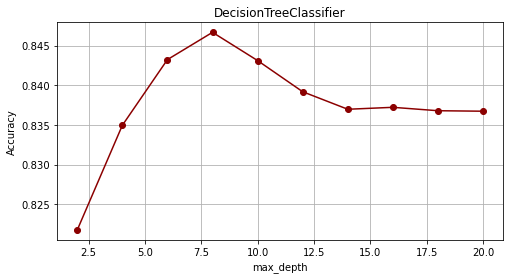

In [14]:
# plotting accuracy score vs. max_depth for DecisionTreeClassifier
# adding grid, labels, and adjusting sizing of graph
plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred',marker='o')
plt.grid()
plt.title("DecisionTreeClassifier")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

In [15]:
%%time
# running RandomForestClassifier with a range of n_estimators
# range command creates list from 50->500 with a step of 50
# including time command so that model creation times can be compared
results = []
n_estimators_options = list(range(50,550,50))
for option in n_estimators_options:
    model = RandomForestClassifier(n_estimators = option, random_state = 42 )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

Wall time: 1min 41s


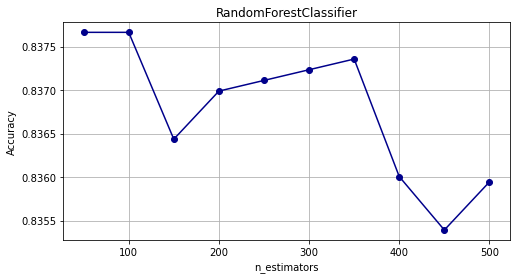

In [16]:
# plotting accuracy score vs. n_estimators for RandomForestClassifier
# adding grid, labels, and adjusting sizing of graph
plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='darkblue',marker='o')
plt.grid()
plt.title("RandomForestClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

In [17]:
%%time
# running AdaBoostClassifier with a range of n_estimators
# range command creates list from 50->500 with a step of 50
# including time command so that model creation times can be compared
results = []
n_estimators_options = list(range(50,550,50))
for option in n_estimators_options:
    model = AdaBoostClassifier(n_estimators = option, random_state = 42 )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

Wall time: 1min 38s


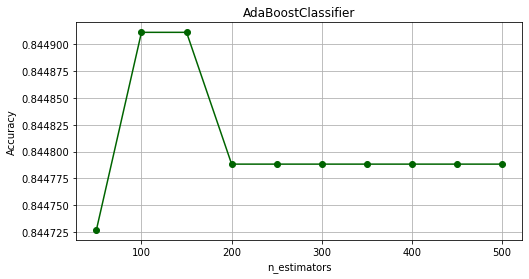

In [18]:
# plotting accuracy score vs. n_estimators for AdaBoostClassifier
# adding grid, labels, and adjusting sizing of graph
plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='darkgreen',marker='o')
plt.grid()
plt.title("AdaBoostClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

In [19]:
%%time
# running GradientBoostingClassifier with a range of n_estimators
# range command creates list from 50->500 with a step of 50
# including time command so that model creation times can be compared
results = []
n_estimators_options = list(range(50,550,50))
for option in n_estimators_options:
    model = GradientBoostingClassifier(n_estimators = option, random_state = 42 )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

Wall time: 1min 29s


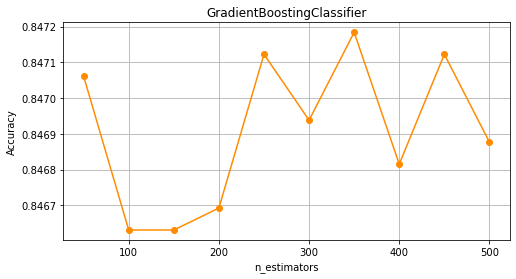

In [20]:
# plotting accuracy score vs. n_estimators for GradientBoostingClassifier
# adding grid, labels, and adjusting sizing of graph
plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='darkorange',marker='o')
plt.grid()
plt.title("GradientBoostingClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

In [21]:
%%time
# running XGBClassifier with a range of n_estimators
# range command creates list from 50->500 with a step of 50
# including time command so that model creation times can be compared
results = []
n_estimators_options = list(range(50,550,50))
for option in n_estimators_options:
    model = XGBClassifier(n_estimators = option, random_state = 42, verbosity=0 )
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

C:\Users\zack\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 58.7 s


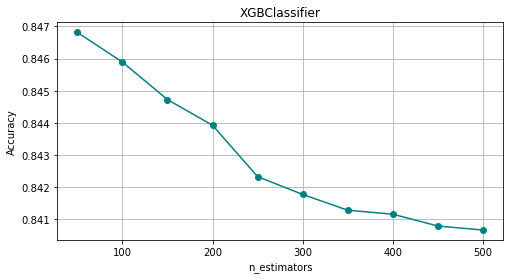

In [22]:
# plotting accuracy score vs. n_estimators for XGBClassifier
# adding grid, labels, and adjusting sizing of graph
plt.figure(figsize=(8,4))
pd.Series(results,n_estimators_options).plot(color='teal',marker='o')
plt.grid()
plt.title("XGBClassifier")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.show()

In [23]:
%%time
# running all 4 models with same n_estimator and random_state to compare
# performance of models given n_estimator value of 50
# including time command so that model creation times can be compared
results = []
model_types = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]
for model_type in model_types:
    model = model_type(n_estimators = 50, random_state = 42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append((model_type.__name__,accuracy))

C:\Users\zack\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 6.38 s


In [24]:
# table showing accuracy vs. model type sorted by accuracy level (descending)
output50 = pd.DataFrame(results,columns=['Model','Accuracy@50'])
output50.sort_values(by=['Accuracy@50'],ascending=False).style.hide_index()

Model,Accuracy@50
GradientBoostingClassifier,0.847061
XGBClassifier,0.846815
AdaBoostClassifier,0.844727
RandomForestClassifier,0.837664


In [25]:
%%time
# running all 4 models with same n_estimator and random_state to compare
# performance of models given n_estimator value of 100
# including time command so that model creation times can be compared
results = []
model_types = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]
for model_type in model_types:
    model = model_type(n_estimators = 100, random_state = 42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append((model_type.__name__,accuracy))

C:\Users\zack\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 12.1 s


In [26]:
# table showing accuracy vs. model type sorted by accuracy level (descending)
output100 = pd.DataFrame(results,columns=['Model','Accuracy@100'])
output100.sort_values(by=['Accuracy@100'],ascending=False).style.hide_index()

Model,Accuracy@100
GradientBoostingClassifier,0.846631
XGBClassifier,0.845894
AdaBoostClassifier,0.844911
RandomForestClassifier,0.837664


In [27]:
%%time
# running all 4 models with same n_estimator and random_state to compare
# performance of models given n_estimator value of 350
# including time command so that model creation times can be compared
results = []
model_types = [RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]
for model_type in model_types:
    model = model_type(n_estimators = 350, random_state = 42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append((model_type.__name__,accuracy))

C:\Users\zack\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Wall time: 43.4 s


In [28]:
# table showing accuracy vs. model type sorted by accuracy level (descending)
output350 = pd.DataFrame(results,columns=['Model','Accuracy@350'])
output350.sort_values(by=['Accuracy@350'],ascending=False).style.hide_index()

Model,Accuracy@350
GradientBoostingClassifier,0.847184
AdaBoostClassifier,0.844788
XGBClassifier,0.841287
RandomForestClassifier,0.837356


In [29]:
output = pd.merge(pd.merge(output50,output100, on='Model'),output350, on='Model')

In [30]:
output.sort_values(by='Model').style.hide_index()

Model,Accuracy@50,Accuracy@100,Accuracy@350
AdaBoostClassifier,0.844727,0.844911,0.844788
GradientBoostingClassifier,0.847061,0.846631,0.847184
RandomForestClassifier,0.837664,0.837664,0.837356
XGBClassifier,0.846815,0.845894,0.841287
